In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from scipy import stats
from wordcloud import WordCloud

# 1. 数据准备
# 读取数据
base_path = r'data/'

ratings_file = os.path.join(base_path, 'rating_auto_label_sentiment_two_classes.csv')
ratings = pd.read_csv(ratings_file)
ratings['review_date'] = pd.to_datetime(ratings['review_date'], errors='coerce')

movies_file = os.path.join(base_path, 'movie.csv')
movies = pd.read_csv(movies_file)
movies['year'] = pd.to_datetime(movies['movie_release_date']).dt.year
movies['year'] = movies['year'].fillna(0).astype(int)

# tags_file = os.path.join(base_path, 'tags.csv')
# tags = pd.read_csv(tags_file)

In [2]:
# 移除 genres 为 "(no genres listed)" 的电影
movies['movie_genre'] = movies['movie_genre'].astype(str)
movies = movies.dropna(subset=['movie_genre'])

# 更新 ratings 和 tags 数据框，只保留有效的 movieid
ratings = ratings[ratings['movieid'].isin(movies['movieid'])]
tags = movies[['movieid','movie_tag']]

In [3]:
display(movies.head(2))
print(movies.shape)

display(tags.head(2))
print(tags.shape)

,movieid,movie_title,movie_year,movie_release_date,movie_genre,movie_rating,movie_href,movie_desc,movie_cast,movie_tag,budget,revenue,page_count,download_flag,year
0,1022789-inside-out-2,Inside Out 2,2024,2024-06-13,Animation|Family|Fantasy|Adventure|Comedy|,76,/movie/1022789-inside-out-2,Teenager Riley\'s mind headquarters is undergo...,Amy Poehler|Maya Hawke|Kensington Tallman|Liza...,sadness|disgust|sequel|computer animation|teen...,200000000.0,1.682636e+09,1,1,2024
1,12445-harry-potter-and-the-deathly-hallows-part-2,Harry Potter and the Deathly Hallows: Part 2,2011,2011-07-12,Fantasy|Adventure|,81,/movie/12445-harry-potter-and-the-deathly-hall...,"Harry, Ron and Hermione continue their quest t...",Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,saving the world|witch|self sacrifice|magic|dy...,125000000.0,1.341511e+09,1,1,2011


(5000, 15)


,movieid,movie_tag
0,1022789-inside-out-2,sadness|disgust|sequel|computer animation|teen...
1,12445-harry-potter-and-the-deathly-hallows-part-2,saving the world|witch|self sacrifice|magic|dy...


(5000, 2)


In [4]:
# 时间筛选：过滤2015年至2023年的评分数据
# ratings['review_date'] = pd.to_datetime(ratings['review_date'])
# ratings_filtered = ratings[(ratings['timestamp'].dt.year >= 2015) & (ratings['timestamp'].dt.year <= 2023)]

# 只保留2015年及以后发行的电影
# movies['year'] = movies['year'].fillna(0).astype(int)
# movies_filtered = movies[movies['year'] >= 2015]

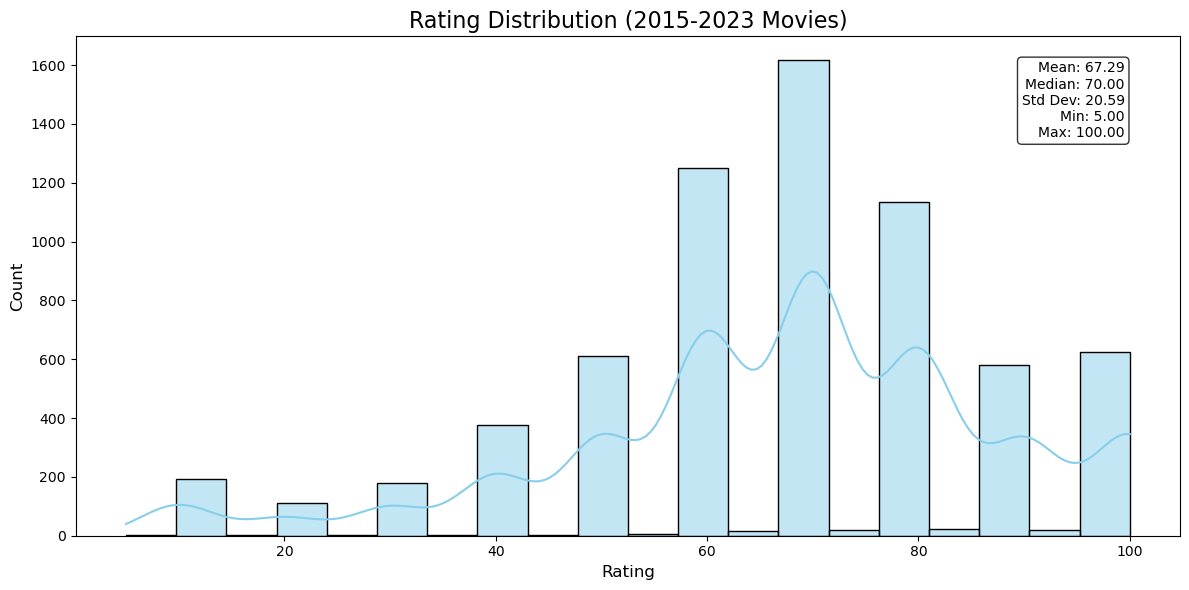

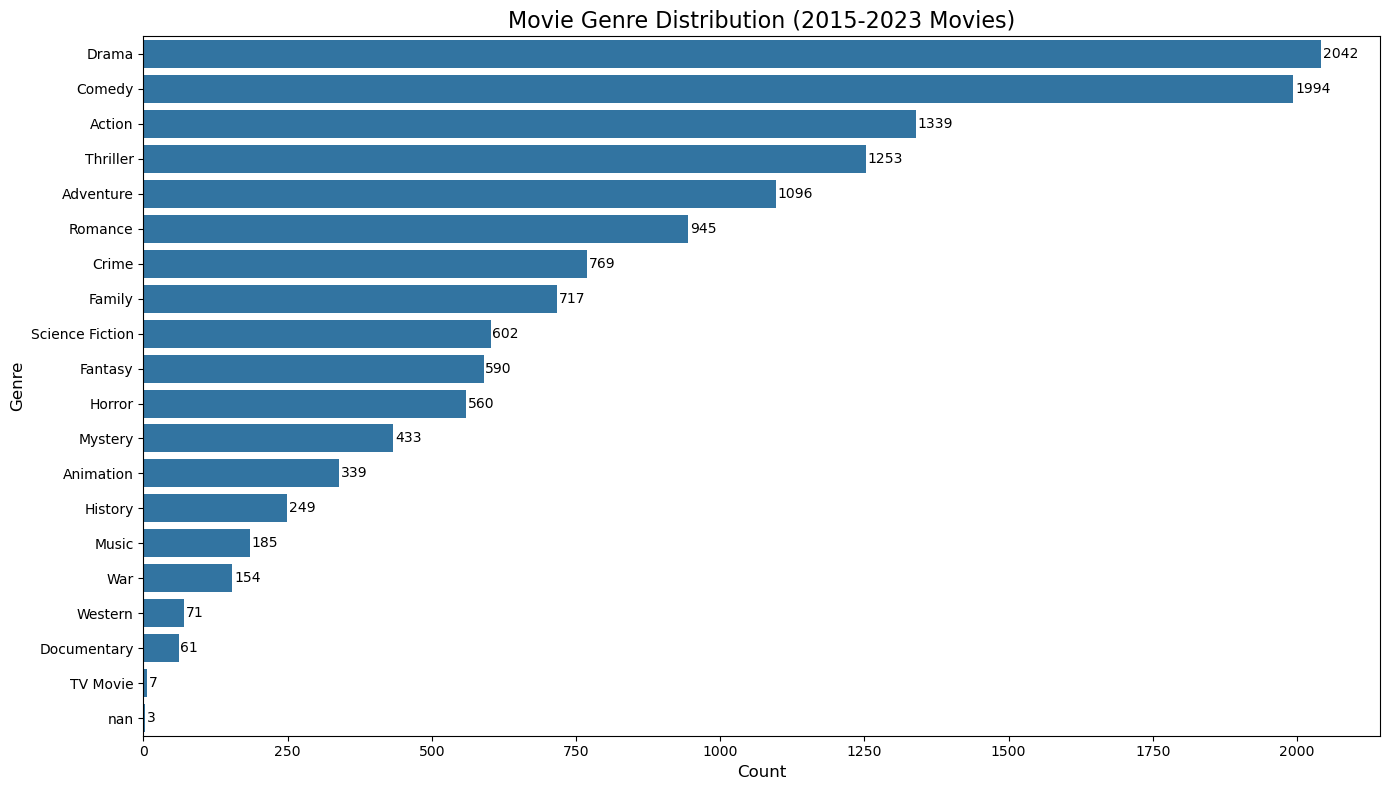

C:\Users\ceffendy\AppData\Local\Temp\ipykernel_17152\2623459131.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_filtered['review_date'] = pd.to_datetime(ratings_filtered['review_date'], errors='coerce')


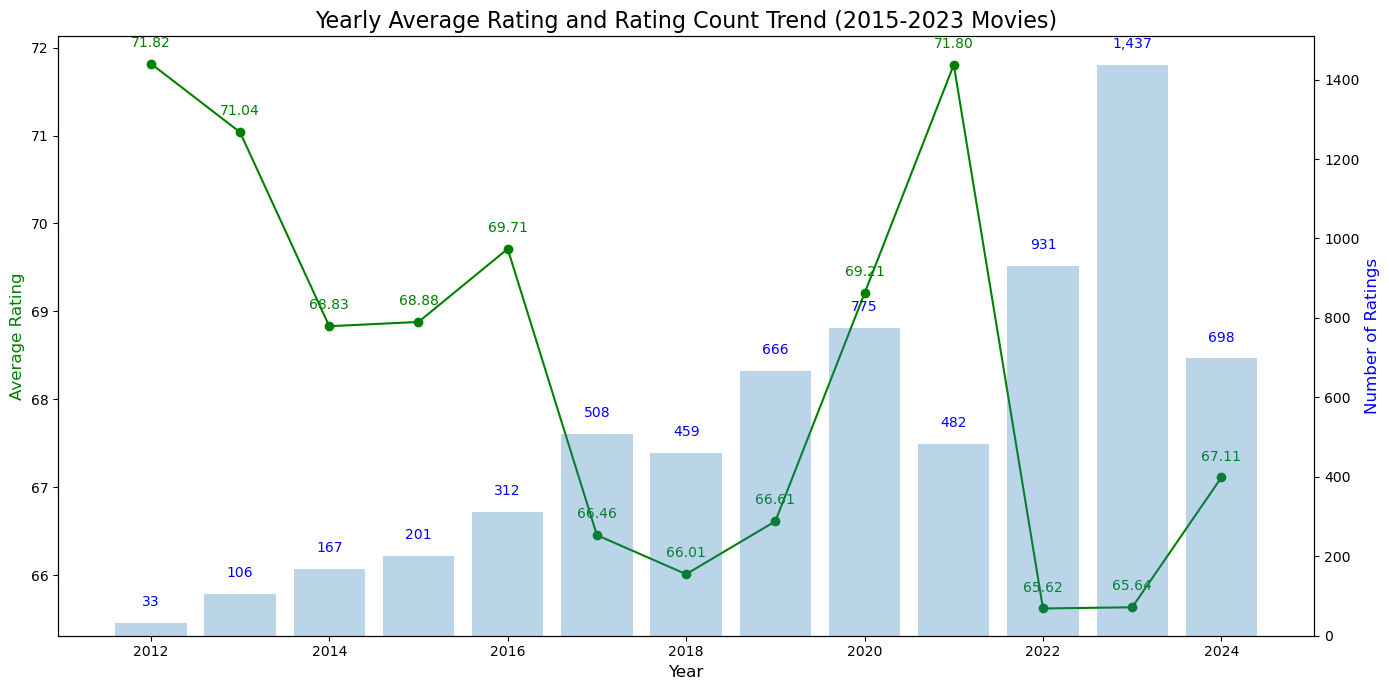

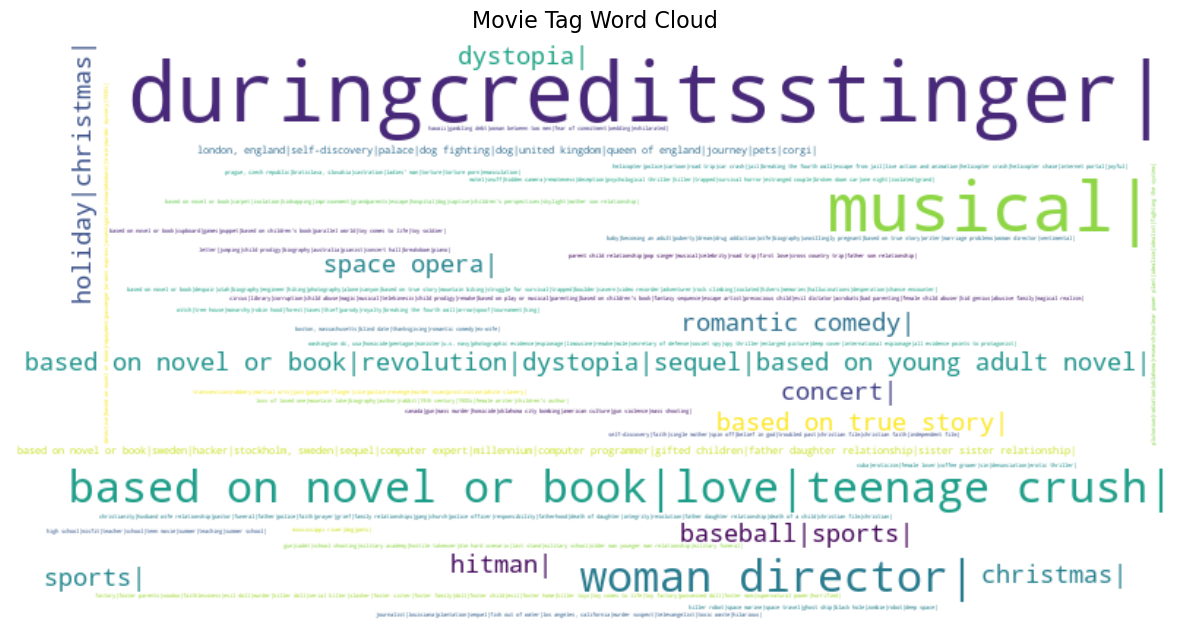

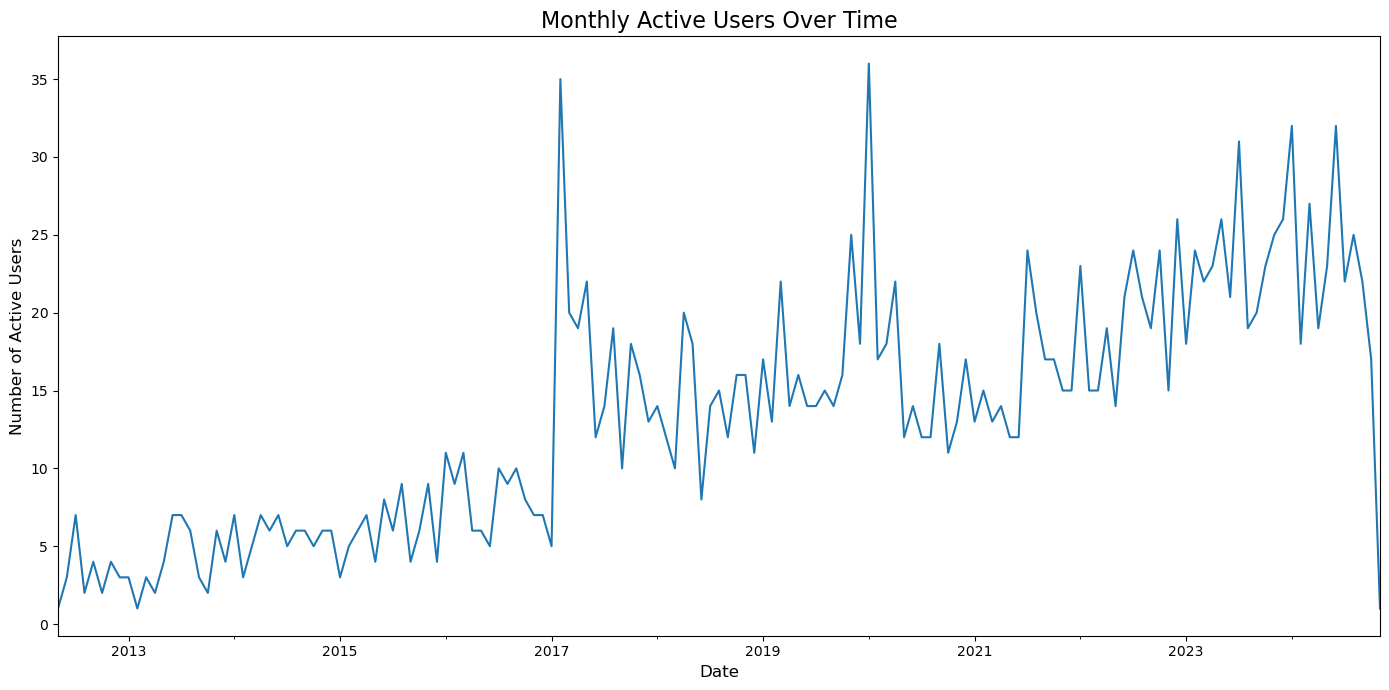

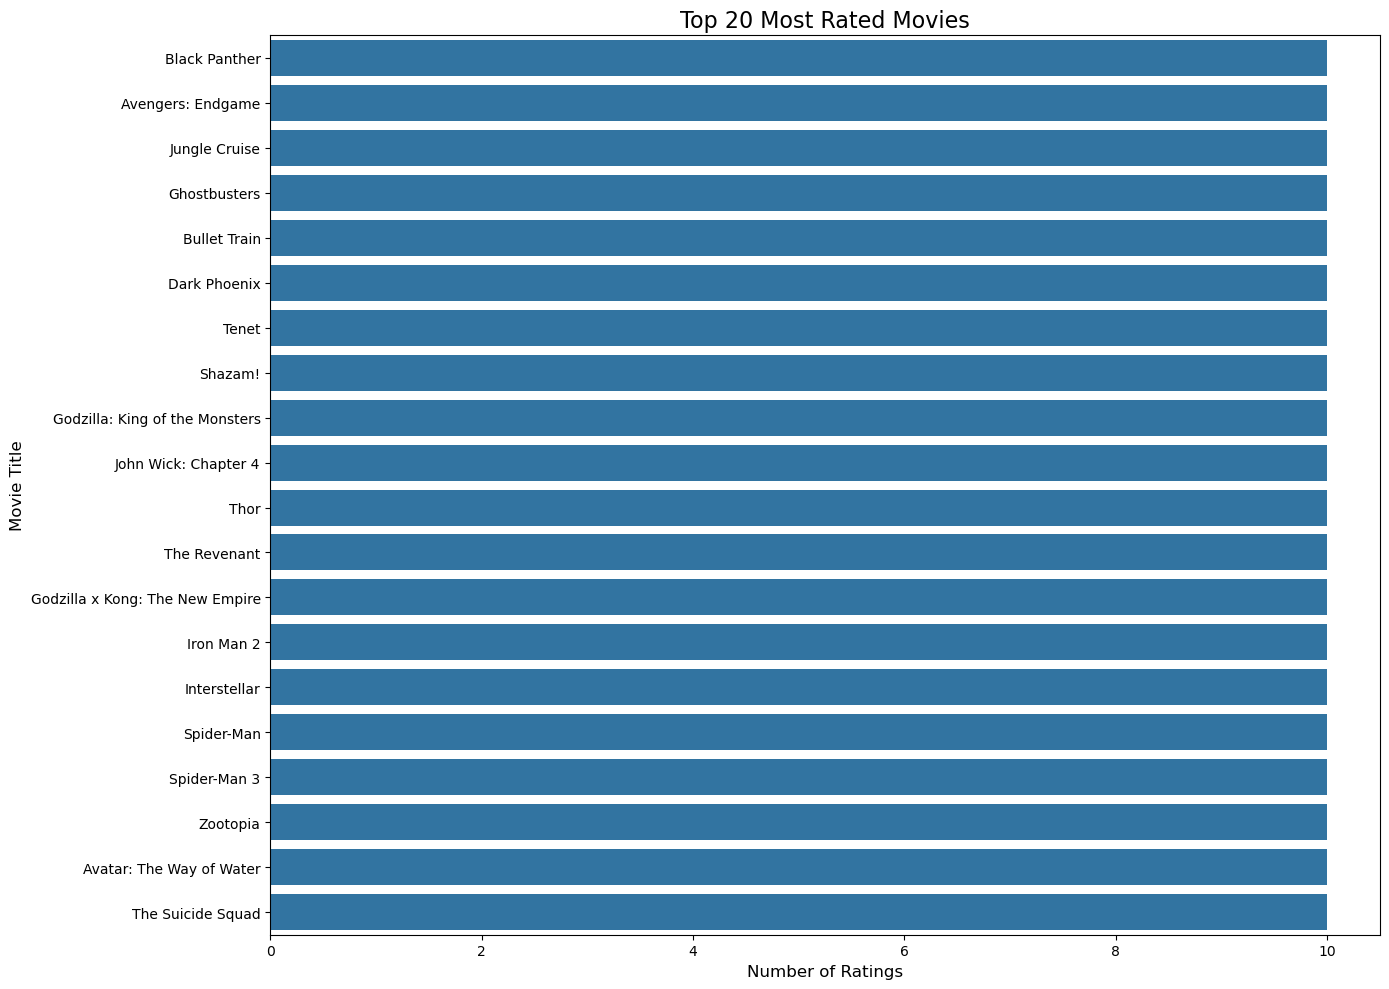


Detailed information about top 20 most rated movies:
                                                           movie_title  num_ratings  avg_rating                         movie_genre
movieid                                                                                                                            
284054-black-panther                                     Black Panther           10        73.0   Action|Adventure|Science Fiction|
299534-avengers-endgame                              Avengers: Endgame           10        86.0   Adventure|Science Fiction|Action|
451048-jungle-cruise                                     Jungle Cruise           10        77.0                  Fantasy|Adventure|
43074-ghostbusters                                        Ghostbusters           10        56.0              Action|Fantasy|Comedy|
718930-bullet-train                                       Bullet Train           10        76.0             Action|Comedy|Thriller|
320288-dark-phoenix   

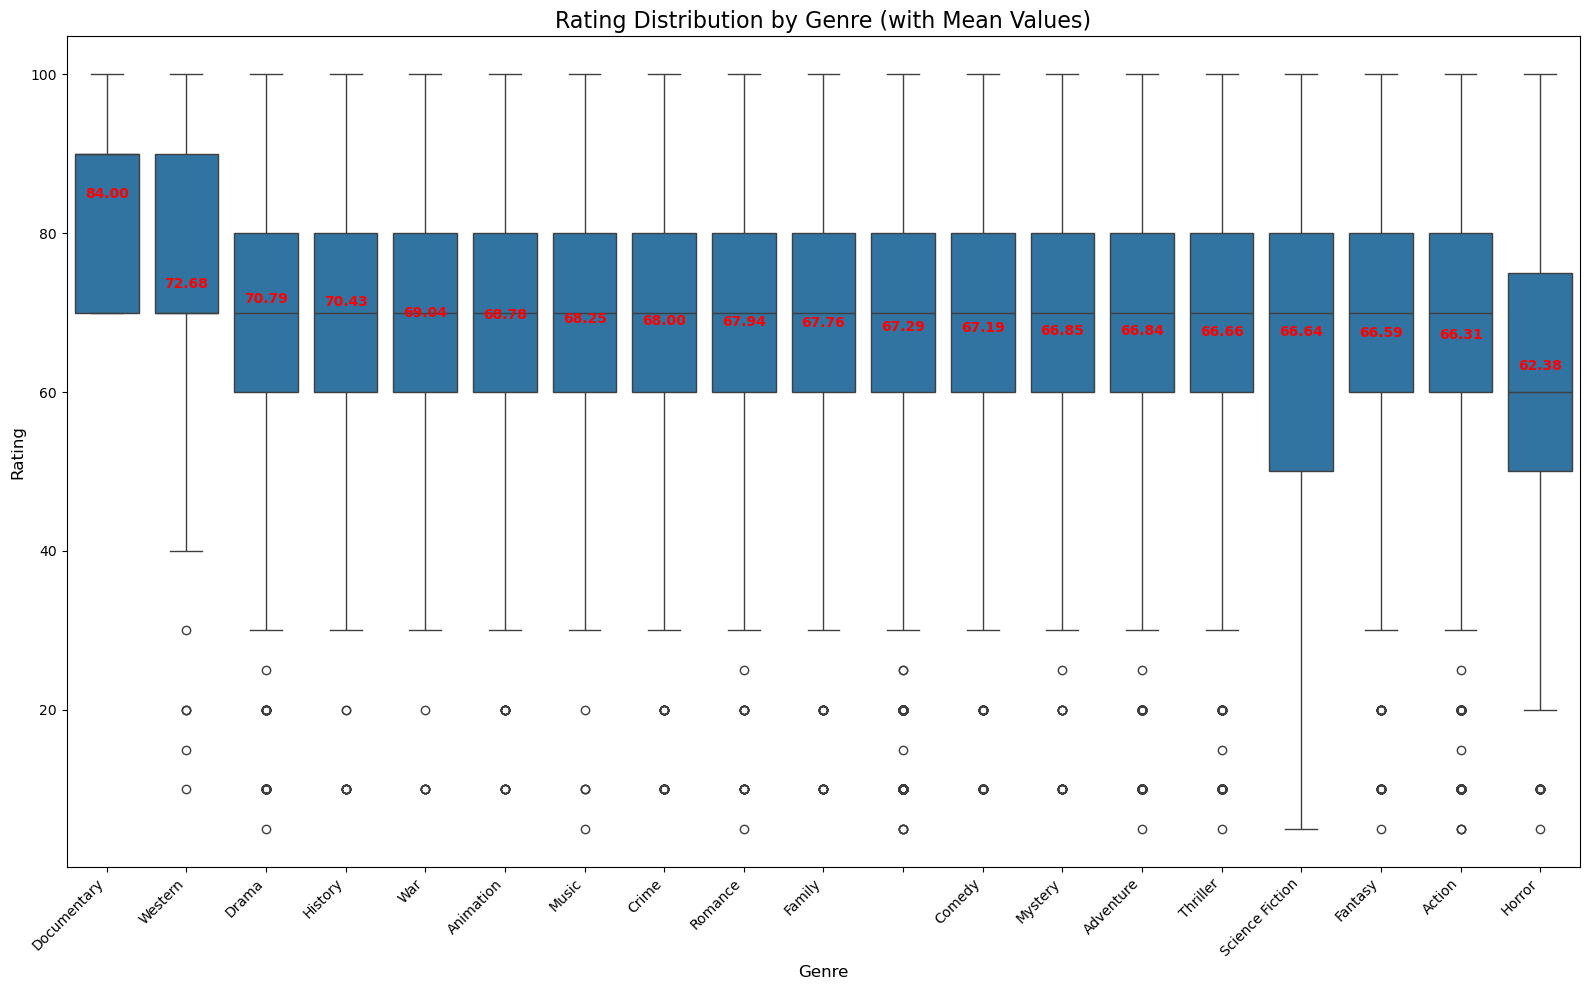

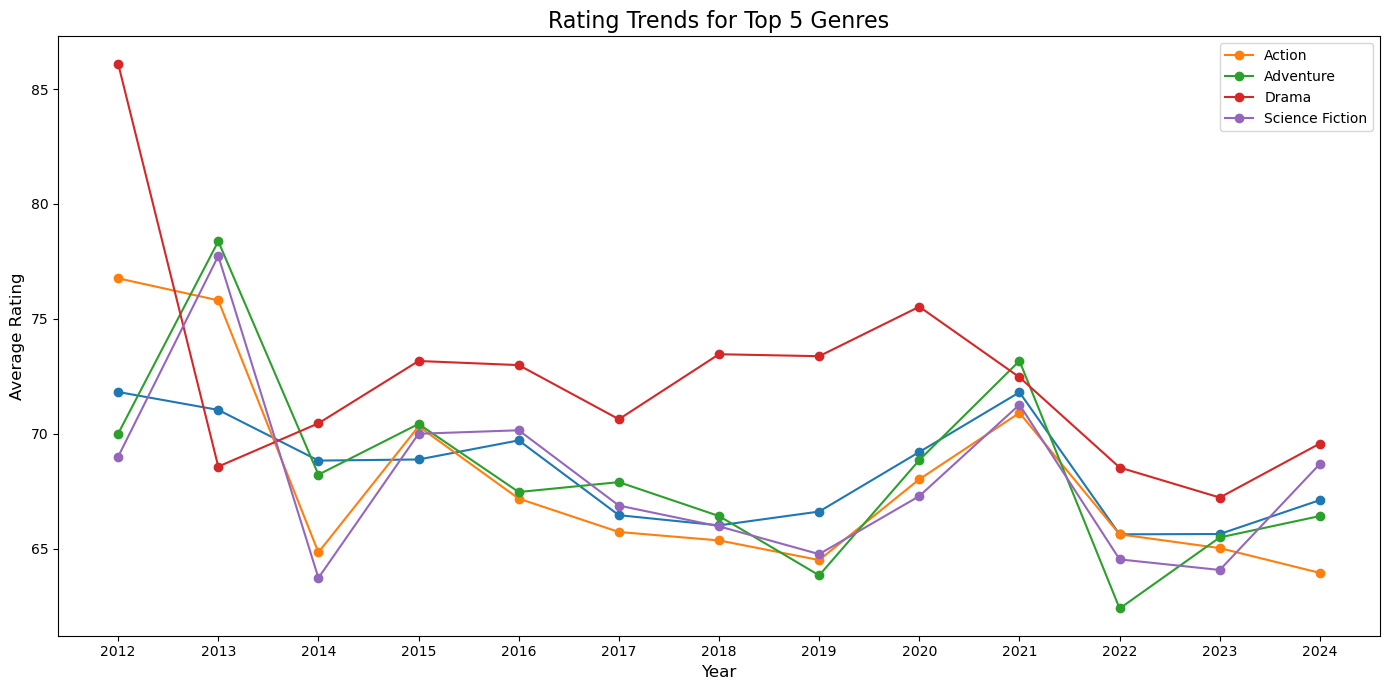

C:\Users\ceffendy\AppData\Local\Temp\ipykernel_17152\2623459131.py:181: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


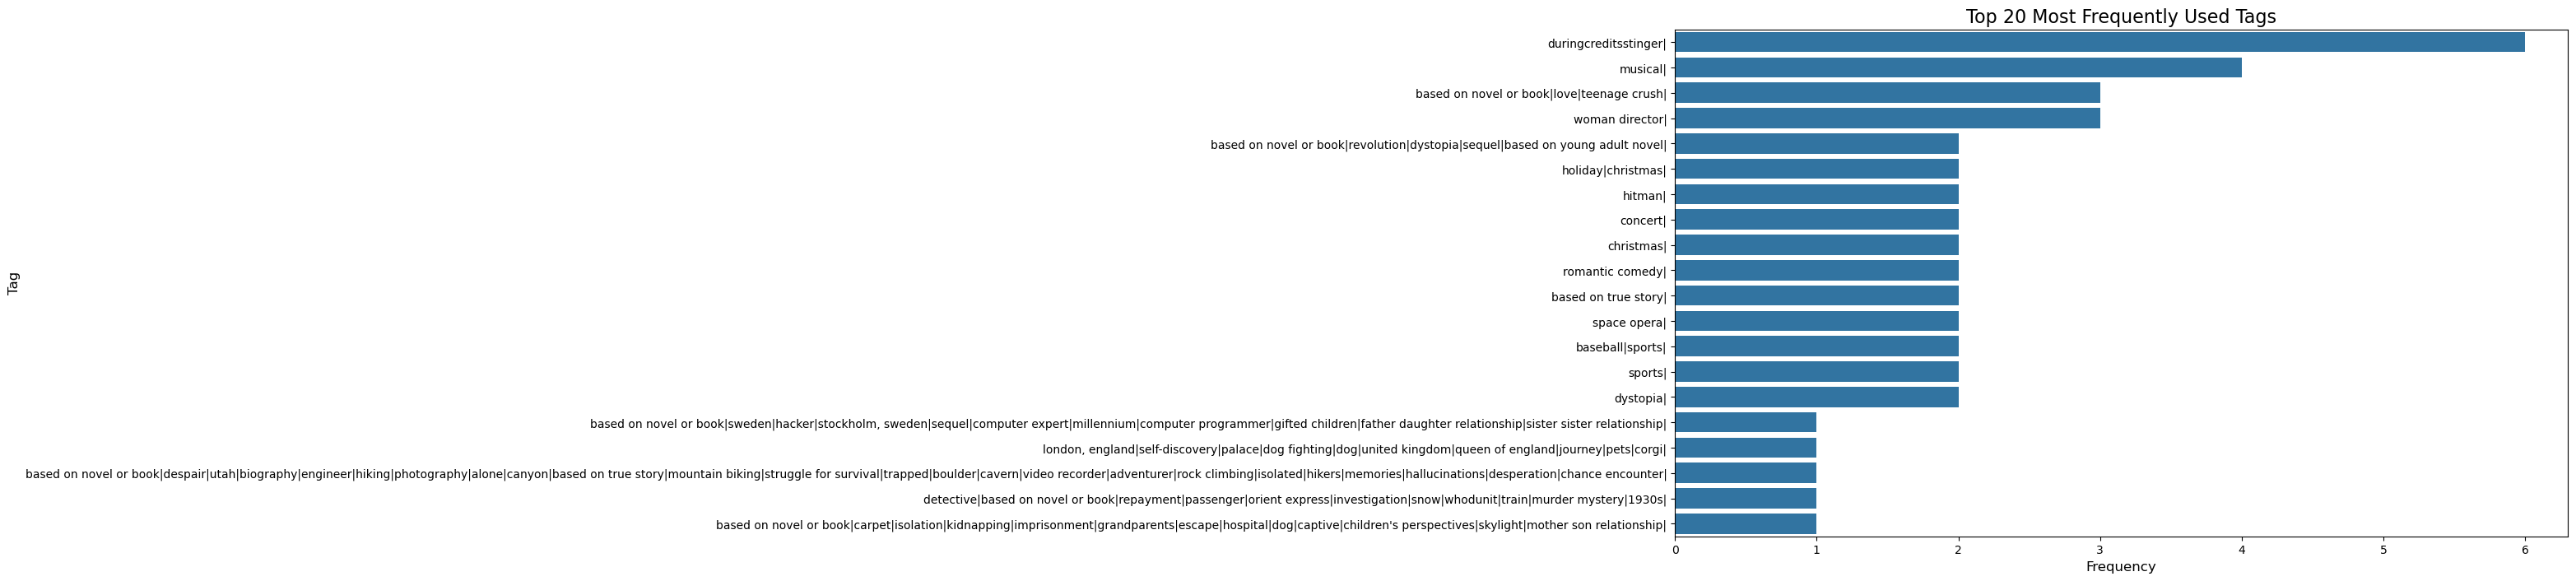


Detailed information about Top 20 Most Frequently Used Tags:
                                                                                                                                                                                                                                                                                  Tag  Frequency  Percentage  Cumulative Percentage
                                                                                                                                                                                                                                                                duringcreditsstinger|          6        0.12                   0.12
                                                                                                                                                                                                                                                                             musical|          4  

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud

def perform_filtered_eda(ratings, movies, tags):
    # # Time filtering: Filter ratings data from 2015 to 2023
    # ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
    # ratings_filtered = ratings[(ratings['timestamp'].dt.year >= 2015) & (ratings['timestamp'].dt.year <= 2023)].copy()
    
    # # Keep only movies released in 2015 and later
    # movies_filtered = movies[movies['year'] >= 2015]
    
    # # Ensure we only analyze ratings for movies released in 2015 and later
    # ratings_filtered = ratings_filtered[ratings_filtered['movieId'].isin(movies_filtered['movieId'])]
    
    # print(f"Filtered ratings data range: {ratings_filtered['timestamp'].min()} to {ratings_filtered['timestamp'].max()}")
    # print(f"Filtered ratings count: {len(ratings_filtered):,} (original data: {len(ratings):,})")
    # print(f"Filtered movies count: {len(movies_filtered):,} (original data: {len(movies):,})")

    ratings_filtered = ratings[ratings['rating']!=0]
    movies_filtered = movies
    
    # 1. Rating Distribution Analysis
    plt.figure(figsize=(12, 6))
    sns.histplot(data=ratings_filtered, x='rating', kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title('Rating Distribution (2015-2023 Movies)', fontsize=16)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Add text box with statistics
    stats = ratings_filtered['rating'].describe()
    stats_text = f"Mean: {stats['mean']:.2f}\n"
    stats_text += f"Median: {stats['50%']:.2f}\n"
    stats_text += f"Std Dev: {stats['std']:.2f}\n"
    stats_text += f"Min: {stats['min']:.2f}\n"
    stats_text += f"Max: {stats['max']:.2f}"
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

    # 2. Movie Genre Distribution
    plt.figure(figsize=(14, 8))
    genre_counts = movies_filtered['movie_genre'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
    ax = sns.barplot(x=genre_counts.values, y=genre_counts.index)
    plt.title('Movie Genre Distribution (2015-2023 Movies)', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    
    # Add value annotations
    for i, v in enumerate(genre_counts.values):
        ax.text(v + 3, i, str(v), va='center')
    
    plt.tight_layout()
    plt.show()

    # 3. Yearly Average Rating and Rating Count Trend
    ratings_filtered['review_date'] = pd.to_datetime(ratings_filtered['review_date'], errors='coerce')
    yearly_ratings = ratings_filtered.groupby(ratings_filtered['review_date'].dt.year)['rating'].agg(['mean', 'count'])
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax2 = ax1.twinx()
    line1 = ax1.plot(yearly_ratings.index, yearly_ratings['mean'], 'g-', marker='o')
    bars = ax2.bar(yearly_ratings.index, yearly_ratings['count'], alpha=0.3)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Average Rating', color='g', fontsize=12)
    ax2.set_ylabel('Number of Ratings', color='b', fontsize=12)
    plt.title('Yearly Average Rating and Rating Count Trend (2015-2023 Movies)', fontsize=16)
    
    # Add value annotations
    for i, (year, data) in enumerate(yearly_ratings.iterrows()):
        ax1.annotate(f'{data["mean"]:.2f}', (year, data['mean']), textcoords="offset points", 
                     xytext=(0,10), ha='center', va='bottom', color='green')
        ax2.annotate(f'{int(data["count"]):,}', (year, data['count']), textcoords="offset points", 
                     xytext=(0,10), ha='center', va='bottom', color='blue')
    
    plt.tight_layout()
    plt.show()

    # 4. Tag Word Cloud
    plt.figure(figsize=(12, 8))
    tags_filtered = tags[tags['movieid'].isin(movies_filtered['movieid'])]
    tag_counts = tags_filtered['movie_tag'].value_counts()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # plt.title('Movie Tag Word Cloud (2015-2023 Movies)', fontsize=16)
    plt.title('Movie Tag Word Cloud', fontsize=16)
    plt.tight_layout()
    plt.show()

    # 5. User Activity Over Time
    plt.figure(figsize=(14, 7))
    user_activity = ratings_filtered.groupby(ratings_filtered['review_date'].dt.to_period('M'))['userid'].nunique()
    user_activity.plot()
    # plt.title('Monthly Active Users Over Time (2015-2023)', fontsize=16)
    plt.title('Monthly Active Users Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Active Users', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 6. Top 20 Most Rated Movies
    top_movies = ratings_filtered['movieid'].value_counts().head(20)
    top_movies_data = movies_filtered[movies_filtered['movieid'].isin(top_movies.index)]
    top_movies_ratings = ratings_filtered[ratings_filtered['movieid'].isin(top_movies.index)]
    
    top_movies_info = top_movies_data.set_index('movieid')
    top_movies_info['num_ratings'] = top_movies
    top_movies_info['avg_rating'] = top_movies_ratings.groupby('movieid')['rating'].mean()
    top_movies_info = top_movies_info.sort_values('num_ratings', ascending=False)

    plt.figure(figsize=(14, 10))
    sns.barplot(x='num_ratings', y='movie_title', data=top_movies_info.reset_index())
    # plt.title('Top 20 Most Rated Movies (2015-2023)', fontsize=16)
    plt.title('Top 20 Most Rated Movies', fontsize=16)
    plt.xlabel('Number of Ratings', fontsize=12)
    plt.ylabel('Movie Title', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\nDetailed information about top 20 most rated movies:")
    print(top_movies_info[['movie_title', 'num_ratings', 'avg_rating', 'movie_genre']].to_string())

    # print("\nEDA for 2015-2023 data completed.")
    print("\nEDA completed.")


    # 8. Rating Distribution by Genre with Average Value Annotations
    plt.figure(figsize=(16, 10))
    genre_ratings = ratings_filtered.merge(movies_filtered[['movieid', 'movie_genre']], on='movieid')
    genre_ratings['movie_genre'] = genre_ratings['movie_genre'].str.split('|')
    genre_ratings = genre_ratings.explode('movie_genre')
    
    # Calculate mean ratings for each genre
    genre_means = genre_ratings.groupby('movie_genre')['rating'].mean().sort_values(ascending=False)
    
    # Create the box plot
    ax = sns.boxplot(x='movie_genre', y='rating', data=genre_ratings, order=genre_means.index)
    
    # Add mean value annotations
    for i, genre in enumerate(genre_means.index):
        mean_val = genre_means[genre]
        ax.text(i, mean_val, f'{mean_val:.2f}', ha='center', va='bottom', color='red', fontweight='bold')

    plt.title('Rating Distribution by Genre (with Mean Values)', fontsize=16)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Rating', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



    # 10. Rating Trends for Top Genres
    top_genres = genre_ratings['movie_genre'].value_counts().nlargest(5).index
    plt.figure(figsize=(14, 7))
    for genre in top_genres:
        genre_data = genre_ratings[genre_ratings['movie_genre'] == genre]
        genre_trend = genre_data.groupby(genre_data['review_date'].dt.to_period('Y'))['rating'].mean()
        plt.plot(genre_trend.index.astype(str), genre_trend.values, marker='o', label=genre)
    plt.title('Rating Trends for Top 5 Genres', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Rating', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


   
   # 12. Tag Usage Frequency
    plt.figure(figsize=(14, 8))
    tag_freq = tags_filtered['movie_tag'].value_counts().head(20)
    sns.barplot(x=tag_freq.values, y=tag_freq.index)
    plt.title('Top 20 Most Frequently Used Tags', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Tag', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Print detailed information about top 20 tags
    print("\nDetailed information about Top 20 Most Frequently Used Tags:")
    tag_details = pd.DataFrame({
        'Tag': tag_freq.index,
        'Frequency': tag_freq.values,
        'Percentage': (tag_freq.values / len(tags_filtered) * 100).round(2)
    })
    tag_details['Cumulative Percentage'] = tag_details['Percentage'].cumsum().round(2)
    print(tag_details.to_string(index=False))

    # Calculate and print some additional tag statistics
    total_tags = len(tags_filtered)
    unique_tags = tags_filtered['movie_tag'].nunique()
    tags_per_movie = tags_filtered.groupby('movieid')['movie_tag'].count().mean()

    print(f"\nTotal number of tags: {total_tags}")
    print(f"Number of unique tags: {unique_tags}")
    print(f"Average number of tags per movie: {tags_per_movie:.2f}")

    # print("\nAdvanced EDA for 2015-2023 data completed.")
    print("\nAdvanced EDA completed.")


# Call the function to perform filtered EDA
perform_filtered_eda(ratings, movies, tags)

In [6]:
# 用户的评分特征
ratings_filtered = ratings[ratings['rating']!=0]
movies_filtered = movies

user_rating_features = ratings_filtered.groupby('userid').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()
user_rating_features.columns = ['userid', 'avg_rating', 'rating_count', 'rating_std']

In [7]:
# 用户的类型偏好特征
movies['movie_genre'] = movies['movie_genre'].str.split('|')

# Remove empty strings from the lists in 'movie_genre'
movies['movie_genre'] = movies['movie_genre'].apply(lambda genres: [g for g in genres if g])

genres = movies['movie_genre'].dropna().explode().unique()
genre_matrix = movies.set_index('movieid')['movie_genre'].apply(lambda x: pd.Series([1 if g in x else 0 for g in genres])).reset_index()
genre_matrix.columns = ['movieid'] + list(genres)

user_genre_preferences = pd.merge(ratings_filtered[['userid', 'movieid', 'rating']], genre_matrix, on='movieid')
user_genre_preferences = user_genre_preferences.groupby('userid')[genres].mean().reset_index()

In [8]:
# 用户的时间特征
user_time_features = ratings_filtered.groupby('userid')['review_date'].agg(['min', 'max']).reset_index()
user_time_features['activity_period'] = (user_time_features['max'] - user_time_features['min']).dt.days


In [9]:
# 合并所有特征
user_features = pd.merge(user_rating_features, user_genre_preferences, on='userid')
user_features = pd.merge(user_features, user_time_features[['userid', 'activity_period']], on='userid')

print("User features shape:", user_features.shape)
print("\nUser features head:")
print(user_features.head())

User features shape: (983, 25)

User features head:
            userid  avg_rating  rating_count  rating_std  Animation  Family  \
0           007ace        40.0             1         NaN        0.0     0.0   
1       15bq1a05k9       100.0             1         NaN        0.0     0.0   
2      1JohnSmith1        66.0            10   20.655911        0.1     0.0   
3  1RobertJohnson1        30.0             1         NaN        0.0     0.0   
4      20thCentury       100.0             1         NaN        0.0     0.0   

   Fantasy  Adventure  Comedy  Action  ...  nan  Music  History  Mystery  \
0      0.0        0.0     0.0     0.0  ...  0.0    0.0      0.0      1.0   
1      0.0        1.0     0.0     1.0  ...  0.0    0.0      0.0      0.0   
2      0.2        0.9     0.0     1.0  ...  0.0    0.0      0.0      0.0   
3      0.0        1.0     0.0     1.0  ...  0.0    0.0      0.0      0.0   
4      0.0        0.0     0.0     0.0  ...  0.0    0.0      0.0      1.0   

   Horror  War  

In [10]:
# 假设我们选择删除包含NaN的行
user_features_clean = user_features.dropna().copy()

# 2. 聚类分析
# 标准化特征
scaler = StandardScaler()
genres = [genre for genre in list(genres) if genre is not None]

features_for_clustering = ['avg_rating', 'rating_count', 'rating_std', 'activity_period'] + list(genres)
features_scaled = scaler.fit_transform(user_features_clean[features_for_clustering])

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 也可以尝试 'SimHei'、'Microsoft YaHei' 等其他中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [11]:
# K-means聚类
n_clusters = 5  # 可以根据需要调整聚类数量
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
features_scaled = features_scaled[~np.isnan(features_scaled).any(axis=1)]
user_features_clean['cluster'] = kmeans.fit_predict(features_scaled)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# 模型评估
silhouette_avg = silhouette_score(features_scaled, user_features_clean['cluster'])
print(f"The average silhouette_score is : {silhouette_avg}")

In [ ]:
# 可视化
# Visualization
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=user_features_clean, x='avg_rating', y='rating_count', 
                          hue='cluster',  
                          palette='deep', sizes=(20, 200), alpha=0.6)
plt.title('User Group Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.xscale('linear')
plt.yscale('log')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 打印每个聚类的用户数量和百分比
# Print the number of users and percentage for each cluster
cluster_sizes = user_features_clean['cluster'].value_counts().sort_index()
cluster_percentages = cluster_sizes / len(user_features_clean) * 100

print("\nNumber of users and percentage for each cluster:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} users ({cluster_percentages[cluster]:.2f}%)")

In [ ]:
def analyze_clusters(user_features_clean, kmeans):
    # 计算每个聚类的平均特征
    # Calculate the average features for each cluster
    cluster_means = user_features_clean.groupby('cluster').mean()
    
    # 计算每个特征的总体平均值
    # Calculate the overall average for each feature
    overall_means = user_features_clean.mean()
    
    # 计算每个聚类相对于总体平均的差异
    # Calculate the difference of each cluster from the overall average
    cluster_diff = cluster_means - overall_means
    
    # 创建热图
    # Create a heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(cluster_diff, cmap='RdBu_r', center=0, annot=True, fmt='.2f')
    plt.title('Difference between Cluster Features and Overall Average')
    plt.show()
    
    # 打印每个聚类的特征描述
    # Print feature descriptions for each cluster
    for cluster in cluster_means.index:
        print(f"\nCluster {cluster} Feature Description:")
        for feature in cluster_means.columns:
            if cluster_diff.loc[cluster, feature] > 0:
                print(f"- {feature}: Above average by  {cluster_diff.loc[cluster, feature]:.2f}")
            else:
                print(f"- {feature}: Below average by {abs(cluster_diff.loc[cluster, feature]):.2f}")

# 运行分析
# Run the analysis
analyze_clusters(user_features_clean, kmeans)

In [ ]:
# 分析电影类型偏好
# Analyze movie genre preferences
genre_preferences = user_features_clean.groupby('cluster')[genres].mean()
plt.figure(figsize=(20, 10))
sns.heatmap(genre_preferences, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Movie Genre Preferences by Cluster')
plt.show()

# Movie Rating User Cluster Analysis Insights

## Cluster Profiles

### Cluster 0 (28.16% of users): "Discerning Drama Enthusiasts"
- **Characteristics**:Higher than average ratings, lower rating count, prefer drama, crime, thriller, war, and western genres
- **User Profile**: Mature viewers who appreciate serious, thought-provoking content and rate selectively

### Cluster 1 (28.12% of users): "Action and Sci-Fi Fans"
- **Characteristics**: Slightly above average ratings, lower rating count, strong preference for adventure, action, sci-fi, and IMAX films
- **User Profile**: Likely younger viewers who enjoy blockbusters and spectacle films

### Cluster 2 (14.47% of users): "Prolific Critics"
- **Characteristics**: Much lower than average ratings, significantly higher rating count and activity period, slight preference for horror and documentary
- **User Profile**: Very active and critical users, possibly including film enthusiasts or professional critics

### Cluster 3 (10.89% of users): "Family-Friendly Viewers"
- **Characteristics**: Average ratings, lower rating count, strong preference for animation, children's movies, adventure, fantasy, and musicals
- **User Profile**: Families with children or individuals who prefer lighter, more wholesome content

### Cluster 4 (18.35% of users): "Casual Romance and Comedy Watchers"
- **Characteristics**: Slightly below average ratings, lowest rating count and activity period, prefer comedy and romance genres
- **User Profile**: Casual viewers who occasionally watch movies for light entertainment

## Recommendations

### 1. Personalized Recommendations
- Cluster 0: High-quality dramas, crime thrillers, and war films
- Cluster 1: Latest action, sci-fi, and IMAX releases
- Cluster 2: Wide range of genres, including niche and critically acclaimed films
- Cluster 3: Family-friendly animations, adventures, and musicals
- Cluster 4: Popular romantic comedies and light-hearted films

### 2. Marketing Strategies
- Cluster 0: Emphasize the depth and artistic merit of films
- Cluster 1: Highlight spectacular visual effects and action sequences
- Cluster 2: Provide in-depth analysis and behind-the-scenes content
- Cluster 3: Focus on family-friendly aspects and wholesome entertainment
- Cluster 4: Stress the feel-good factor and escapism of romantic comedies

### 3. User Experience Optimization
- Cluster 0: Implement advanced filtering for serious, mature content
- Cluster 1: Showcase new releases in action and sci-fi categories
- Cluster 2: Create platforms for writing detailed reviews and discussions
- Cluster 3: Offer family viewing guides and parental control settings
- Cluster 4: Develop mood-based recommendation features for casual viewing

### 4. Content Strategy
- Acquire a balanced mix of genres to cater to all clusters
- Focus on high-quality productions in drama, action/sci-fi, and family-friendly categories
- Consider producing content that appeals to multiple clusters, such as high-quality family adventure films
- Ensure a steady stream of new releases for the most active Cluster 2

## Conclusion

These insights can help movie platforms better serve different types of users, improving user satisfaction and platform engagement. By tailoring recommendations, marketing approaches, user experience, and content strategies to these distinct user clusters, platforms can create more personalized and effective services. Regular updates to this clustering model will help track evolving user preferences and behaviors, ensuring the platform remains responsive to its audience's needs.